In [1]:
import os
import torch
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import datasets, transforms 

import sklearn
import itertools 
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer

%matplotlib inline

import polyhedra as poly
from polyhedra import cx

In [6]:
from importlib import reload
reload(cx)

<module 'polyhedra.cx' from 'C:\\Users\\Marissa\\Documents\\MLProjects\\PolyCXTorch\\polyhedra\\cx.py'>

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Using {} device'.format(device))

Using cpu device


# Wider intermediate layers
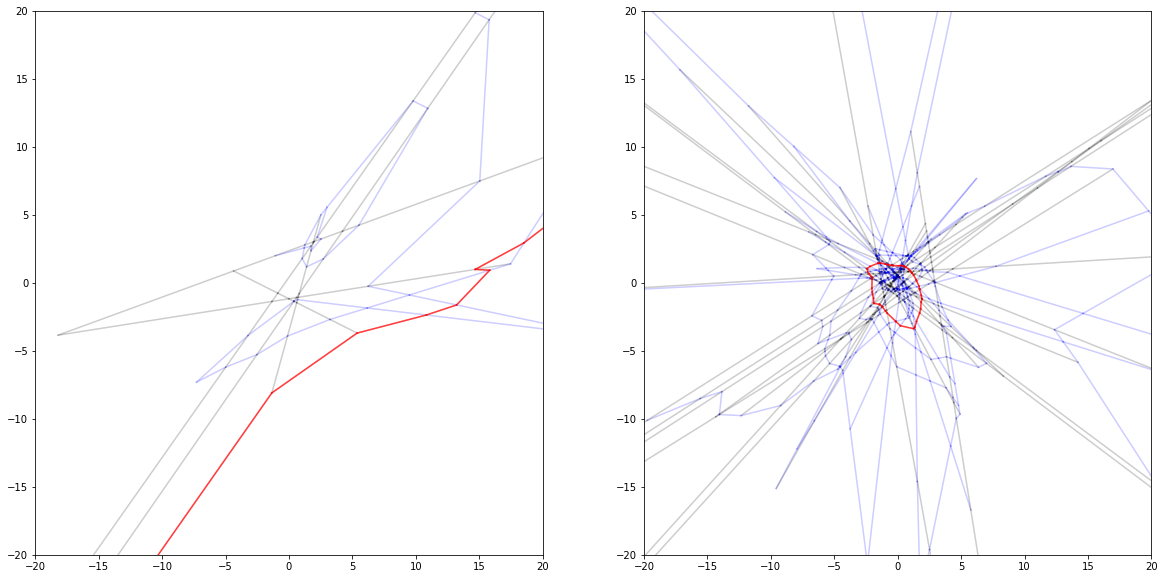

In [21]:
reload(cx)

#Perform for two architectures 

architecture = (2,6,6,1,1)
model0 = cx.NeuralNetwork(architecture=architecture).to(device) 
#print(model0.parameters)
alldict0, allpts0, allssv0 = cx.get_full_complex(model0, max_depth=3)
colors0 = ['black']*architecture[1]+['blue']*architecture[2]+['red']
dict_ = {key:alldict0[key].detach().numpy() for key in alldict0}

# architecture = (2,20,20,1,1)
# model1 = cx.NeuralNetwork(architecture=architecture).to(device) 
# alldict1, allpts1, allssv1 = cx.get_full_complex(model1, max_depth=3)
# colors1 = ['black']*architecture[1]+['blue']*architecture[2]+['red']


<AxesSubplot:>

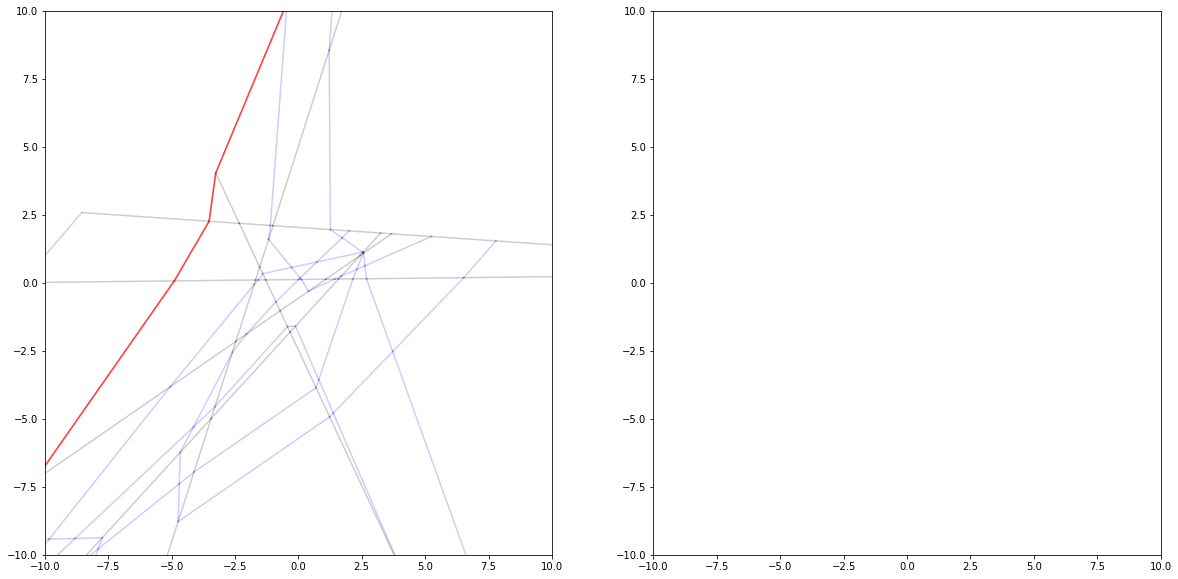

In [22]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
bound=10
for i in range(2):
    ax[i].set_xlim(-bound,bound)
    ax[i].set_ylim(-bound,bound)

cx.plot_complex(dict_,13,colors=colors0,ax=ax[0])
#cx.plot_complex(alldict1,41,colors=colors1,ax=ax[1])

# Wider input layer (?) 

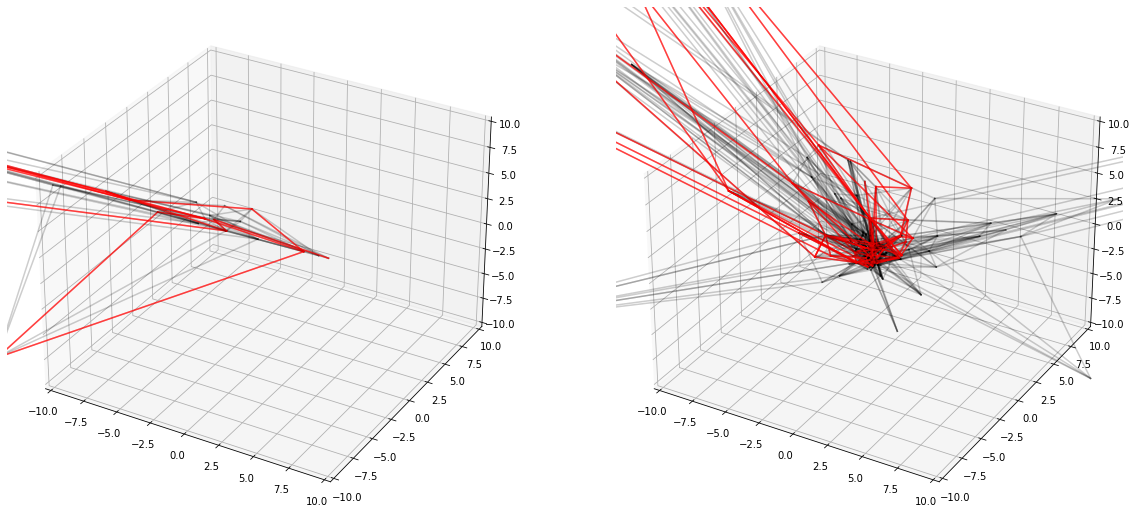

In [11]:
#Perform for two larger architectures .... what even. Can't quite verify it's doing the right thing.

architecture = (3,5,1,1,1)
model0 = cx.NeuralNetwork(architecture=architecture).to(device) 
alldict0, allpts0, allssv0 = cx.get_full_complex(model0,max_depth=2)
colors0 = ['black']*architecture[1]+['red']

architecture = (3,10,1,1,1)
model1 = cx.NeuralNetwork(architecture=architecture).to(device) 
alldict1, allpts1, allssv1 = cx.get_full_complex(model1,max_depth=2)

colors1 = ['black']*architecture[1]+['red']


<Axes3DSubplot:>

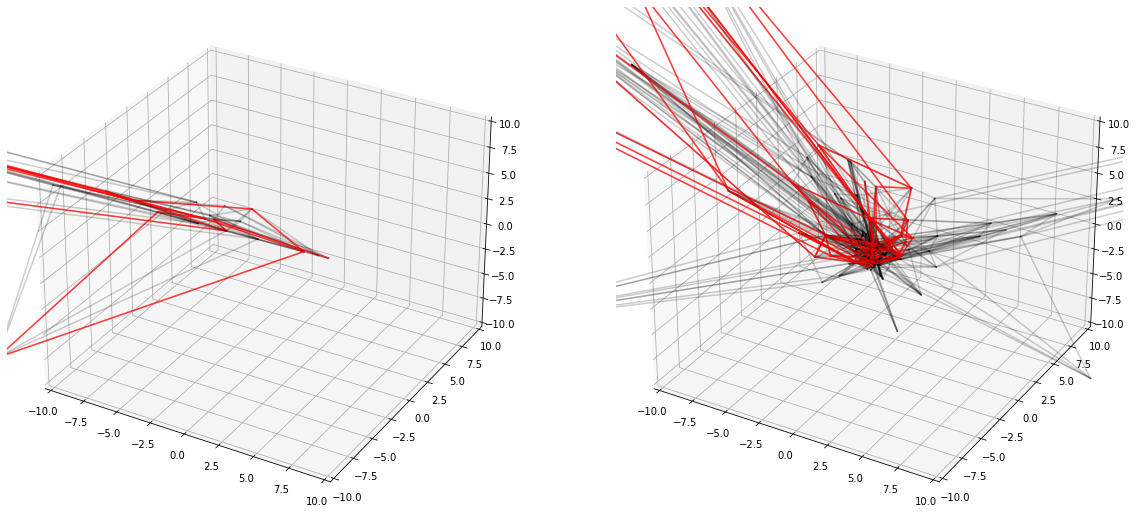

In [12]:
fig=plt.figure(figsize=(20,10))
ax=[]
ax.append(fig.add_subplot(121,projection='3d'))
ax.append(fig.add_subplot(122,projection='3d'))
bound=10
for i in range(2):
    ax[i].set_xlim(-bound,bound)
    ax[i].set_ylim(-bound,bound)
    ax[i].set_zlim(-bound,bound)


cx.plot_complex(alldict0,6,colors=colors0,ax=ax[0])
cx.plot_complex(alldict1,11,colors=colors1,ax=ax[1])

# Time analysis (2d vs 3d inputs)

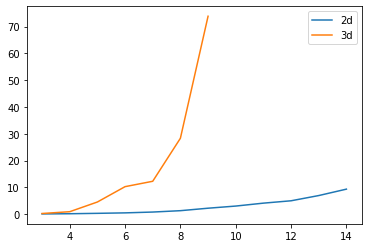

In [68]:
#2d vs 3d inputs 

time_by_size_2d = [] 
sizes = np.array(list(range(3,15)))

for isize in sizes:
    
    architecture = (2,isize,isize,1)
    model = NeuralNetwork(architecture=architecture).to(device)
    
    t0 = timer() 
    alldict, allpts, allssv = cx.get_full_complex(model)
    t1 = timer() 
    time_by_size_2d.append(t1-t0)
    #print(isize)


In [72]:
#2d vs 3d inputs 

time_by_size_3d = [] 
sizes = np.array(list(range(3,10)))

for isize in sizes:
    
    architecture = (3,isize,isize,1)
    model = NeuralNetwork(architecture=architecture).to(device)
    
    t0 = timer() 
    alldict, allpts, allssv = cx.get_full_complex(model)
    t1 = timer() 
    time_by_size_3d.append(t1-t0)
    print(isize)


3
4
5
6
7
8
9


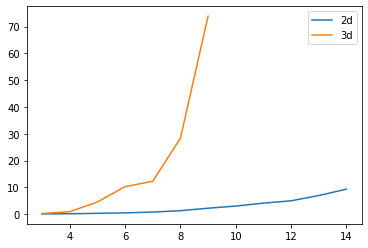

In [81]:
sizes = np.array(list(range(3,15)))
plt.plot(sizes,time_by_size_2d,label='2d')

sizes = np.array(list(range(3,10)))
plt.plot(sizes,time_by_size_3d,label='3d')

plt.legend()

# Depth of network is no longer annoying

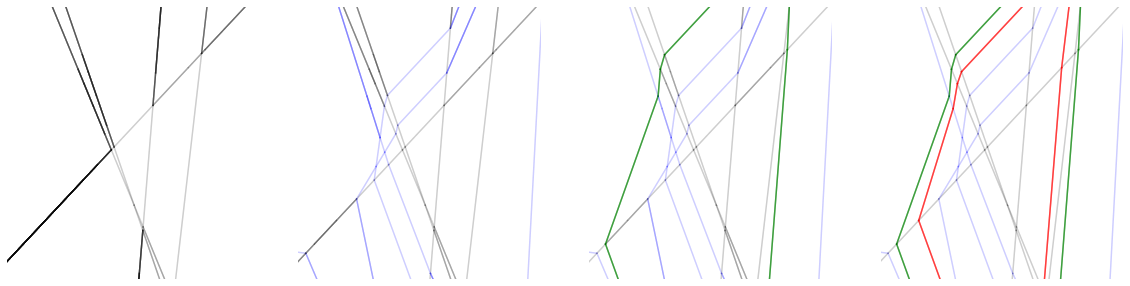

In [25]:
# adding network layer by layer 
#Perform for two architectures 

w = 8

architecture = (2,w,w,w,1)
model0 = cx.NeuralNetwork(architecture=architecture).to(device) 
alldict0, allpts0, allssv0 = cx.get_full_complex(model0, max_depth=4)


<AxesSubplot:>

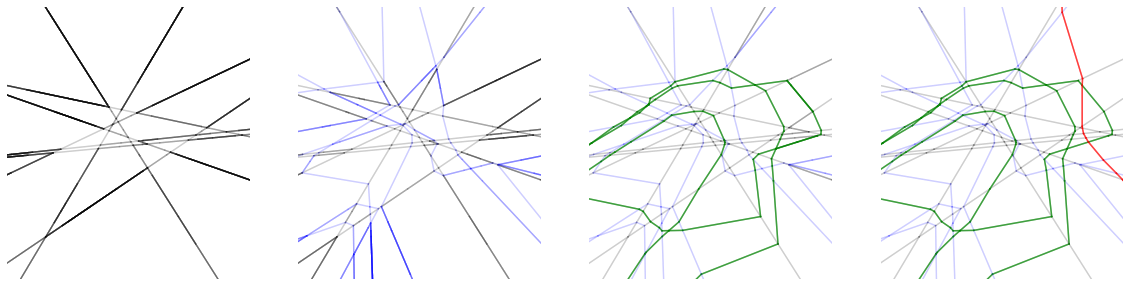

In [28]:
colors0 = ['black']*w+['blue']*w+['green']*w + ['red']*1

fig,ax=plt.subplots(1,4,figsize=(20,5))
bound=5
for i in range(4):
    ax[i].set_xlim(-bound,bound)
    ax[i].set_ylim(-bound,bound)
    ax[i].axis("off")

cx.plot_complex(alldict0,w,colors=colors0,ax=ax[0])
cx.plot_complex(alldict0,2*w,colors=colors0,ax=ax[1])
cx.plot_complex(alldict0,3*w,colors=colors0,ax=ax[2])
cx.plot_complex(alldict0,3*w+1,colors=colors0,ax=ax[3])